# Plotting of data

In [105]:
import re
import pickle
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
def get_floats_from_filename(filename):
    return re.findall(r"[+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?", filename)


def create_dict_for_folder(folderdir):
    file_names_in_folder = os.listdir(folderdir)
    stepsize_filename_dict = dict()
    for x in file_names_in_folder:
        stepsize_filename_dict[x] = [float(y)  for y in get_floats_from_filename(x)] #assume fix order a,b,gamma,h
    return stepsize_filename_dict    
    

In [106]:
base_folder_dir = 'data/multi_pendulum_inversion'
def get_data_from_folder(foldername):
    folder_names = os.listdir(foldername+'/')
    dict_of_folders_with_files = dict()
    for x in folder_names:
        if x != '.DS_Store':
            dict_of_folders_with_files[x] = create_dict_for_folder(foldername+'/' +x)
    #Structure of data dict:
        # data_dict["folder_name"]=[ {"file_name":data}, [alpha,beta,gamma,h] ]
    data_dict = dict()
    for x in dict_of_folders_with_files.keys():
        for y in dict_of_folders_with_files[x].keys():
            filename = foldername+"/"+x + "/"+y
            with open(filename, 'rb') as files:
                data_dict[y] = [pickle.load(files) ,dict_of_folders_with_files[x][y]]
    return data_dict            


base_folder_dir_test = base_folder_dir

base_foldername = base_folder_dir_test 
data=get_data_from_folder(base_foldername)


In [107]:

def get_fig_plot_data_from_dict(dict_with_data,use_new_approach = True,is_cartesian=True):
    
    if use_new_approach is True:
        q_d,lam_d,u_d = dict_with_data["q_d_new_cartesian"],dict_with_data["lambda_d_new"],dict_with_data["u_d_new"]

        v_y_d = dict_with_data['v_y_d_new']  
        H_evo = dict_with_data['H_control_new']
    else:
        q_d,lam_d,u_d = dict_with_data["q_d_standard"],dict_with_data["lambda_v_standard"],dict_with_data["u_d_standard"]
        if is_cartesian:
            conserved_I_evo = dict_with_data['I_d_standard']
        else:
            conserved_I_evo = dict_with_data["lambda_q_standard"][:,0]
        v_y_d = np.array([dict_with_data['vq_d_standard'],  dict_with_data['lambda_q_standard']])
        print("wrong v_y_d for standard")
        H_evo = dict_with_data['H_control_new']
    parameters = dict_with_data["parameters"]

    phase_space_evo = [[],[]]
    for x in q_d:
        tmp = x
        phase_space_evo[0].append(tmp[0])
        phase_space_evo[1].append(tmp[1])
    time_vals = parameters["times"]
    phase_space_lamevo = [[],[]]
    for x in lam_d:
        tmp = x
        phase_space_lamevo[0].append(tmp[0])
        phase_space_lamevo[1].append(tmp[1])

    u_d_vals = u_d
   
    return time_vals,phase_space_evo,phase_space_lamevo,u_d_vals,v_y_d,H_evo,parameters


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


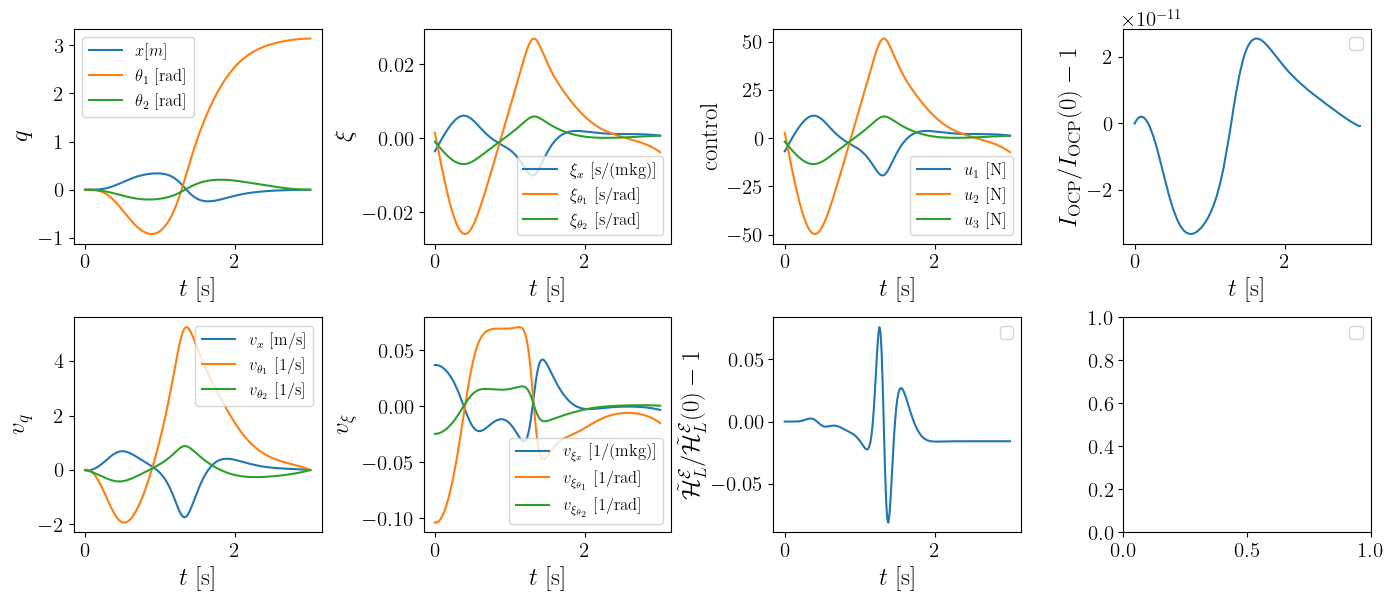

In [ ]:

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "amsmath"
})


alpha_choice,gamma_choice = 1,0.5
N_choice = 200

file_name_u =  "data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(N_choice)+".pkl"


loaded_dict_fig1_u = data[file_name_u][0]
u_dep_fig1_data = get_fig_plot_data_from_dict(loaded_dict_fig1_u)
properly_calc_u_d = u_dep_fig1_data[3]
labelfont = 18
tickfont = 15
legendfont = 12

fig, axs = plt.subplots(2, 4,figsize=(14,6))
times = loaded_dict_fig1_u["parameters"]["times"]
axs[0,0].plot(times,loaded_dict_fig1_u["q_d_new"].transpose()[0],label=r'$x[m]$')
axs[0,0].plot(times,loaded_dict_fig1_u["q_d_new"].transpose()[1],label=r'$\theta_1$ [rad]')
axs[0,0].plot(times,loaded_dict_fig1_u["q_d_new"].transpose()[2],label=r'$\theta_2$ [rad]')
axs[0,0].ticklabel_format(style='sci')
axs[0,0].tick_params(labelsize=tickfont)
axs[0,0].set_xlabel(r'$t$ [s]',fontsize=labelfont)
axs[0,0].set_ylabel(r'$q$',fontsize=labelfont)

axs[0,2].plot(times,loaded_dict_fig1_u["u_d_new"].transpose()[0],label=r"$u_1$ [N]")
axs[0,2].plot(times,loaded_dict_fig1_u["u_d_new"].transpose()[1],label=r"$u_2$ [N]")
axs[0,2].plot(times,loaded_dict_fig1_u["u_d_new"].transpose()[2],label=r"$u_3$ [N]")
axs[0,2].set_ylabel('control',fontsize=labelfont)
axs[0,2].set_xlabel(r'$t$ [s]',fontsize=labelfont)

axs[0,1].plot(times,loaded_dict_fig1_u["lambda_d_new"].transpose()[0],label=r"$\xi_x$ [s/(mkg)]")
axs[0,1].plot(times,loaded_dict_fig1_u["lambda_d_new"].transpose()[1],label=r"$\xi_{\theta_1}$ [s/rad]")
axs[0,1].plot(times,loaded_dict_fig1_u["lambda_d_new"].transpose()[2],label=r"$\xi_{\theta_2}$ [s/rad]")
axs[0,1].set_ylabel(r'$\xi$',fontsize=labelfont)
axs[0,1].set_xlabel(r'$t$ [s]',fontsize=labelfont)

axs[0,3].plot(times,(loaded_dict_fig1_u["I_d_new"]-loaded_dict_fig1_u["I_d_new"][0])/loaded_dict_fig1_u["I_d_new"][0])

axs[0,3].set_ylabel(r'$ I_\mathrm{OCP}/I_\mathrm{OCP}(0)-1$',fontsize=labelfont)
axs[0,3].set_xlabel(r'$t$ [s]',fontsize=labelfont)

axs[1,0].plot(times,loaded_dict_fig1_u["v_y_d_new"].transpose()[0],label=r'$v_x$ [m/s]')
axs[1,0].plot(times,loaded_dict_fig1_u["v_y_d_new"].transpose()[1],label=r'$v_{\theta_1}$ [1/s]')
axs[1,0].plot(times,loaded_dict_fig1_u["v_y_d_new"].transpose()[2],label=r'$v_{\theta_2}$ [1/s]')
axs[1,0].set_ylabel(r'$v_q$',fontsize=labelfont)
axs[1,0].set_xlabel(r'$t$ [s]',fontsize=labelfont)

axs[1,1].plot(times,loaded_dict_fig1_u["v_y_d_new"].transpose()[3],label=r'$v_{\xi_x}$ [1/(mkg)]')
axs[1,1].plot(times,loaded_dict_fig1_u["v_y_d_new"].transpose()[4],label=r'$v_{\xi_{\theta_1}}$ [1/rad]')
axs[1,1].plot(times,loaded_dict_fig1_u["v_y_d_new"].transpose()[5],label=r'$v_{\xi_{\theta_2}}$ [1/rad]')
axs[1,1].set_ylabel(r'$v_{\xi}$',fontsize=labelfont)
axs[1,1].set_xlabel(r'$t$ [s]',fontsize=labelfont)

axs[1,2].plot(times,(loaded_dict_fig1_u["H_control_new"]-loaded_dict_fig1_u["H_control_new"][0])/(loaded_dict_fig1_u["H_control_new"][0]))
axs[1,2].set_ylabel(r'$\tilde{\mathcal{H}}_L^\mathcal{E}/\tilde{\mathcal{H}}_L^\mathcal{E}(0)-1$',fontsize=labelfont)
axs[1,2].set_xlabel(r'$t$ [s]',fontsize=labelfont)

plt.tight_layout()

for tmpouter in axs:
    for tmp in tmpouter:
        tmp.tick_params(labelsize=tickfont)
        tmp.legend(fontsize=legendfont)
        txt = tmp.yaxis.get_offset_text()
        txt.set_fontsize(tickfont)


# plt.savefig('double_pendulum_illustration.pdf')